In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from statsmodels.stats.outliers_influence import summary_table

# Data loading
Я обрав компанію Goldman Sachs.

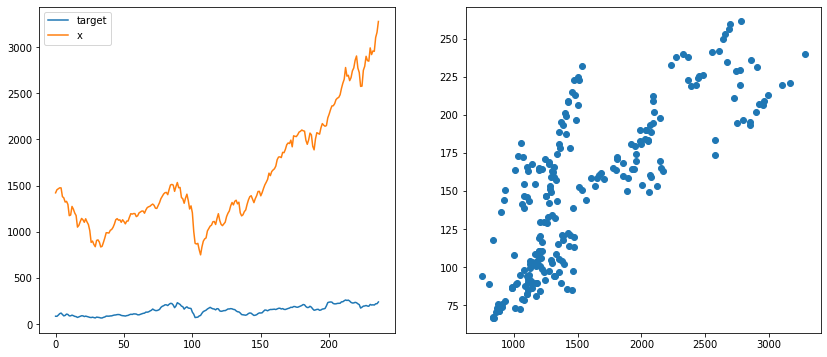

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data_gs = pd.read_csv('GS.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data_sp500 = pd.read_csv('^GSPC.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

target = ((data_gs['High'] + data_gs['Low']) / 2.).values
x = ((data_sp500['High'] + data_sp500['Low'])/2.).values

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target, label='target')
plt.plot(x, label='x')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.show();

# Model comparison

### Model parameters

In [3]:
class Model:
    def __init__(self, x, y):
        self.n = x.shape[0]
        self.x = x
        self.x_mean = self.x.mean()
        self.x_std = self.x.std()
        
        self.y = y
        self.y_mean = self.y.mean()
        self.y_std = self.y.std()
        
        self.alpha, self.beta = self.param_eval()
    
    def predict(self, x, confidence = False):
        preds = list()
        for i in range(self.n):
            res = self.alpha + self.beta * x[i]
            preds.append(res)
        return np.array(preds)
    
    def R_squared(self):
        corr_coef = np.corrcoef(self.x, self.y)
        return corr_coef[0][1] ** 2
    
    def param_eval(self):
        beta = sum((self.x - self.x_mean) * (self.y - self.y_mean)) / (self.n * self.x_std ** 2)
        alpha = self.y_mean - beta * self.x_mean
        return alpha, beta
    
    def F_statistic(self):
        y_hat = self.predict(self.x)
        f_stat = (self.n - 2) * sum((y_hat - self.y_mean) ** 2) / (sum ((self.y - y_hat) ** 2))
        return f_stat
    
    def parameters(self):
        return self.alpha, self.beta

## Model 1: $y = \alpha * \beta ^{x} $
$y = \alpha * \beta ^{x} $    ==>   $ln(y) = ln(\alpha) + ln(\beta) * x $

Parameters: 
alpha: 68.4891  beta: 1.0005
R_squared: 0.55887  r: 0.74757  f_statistic: 297.7181
Elasticiy:  0.00045590612412498455


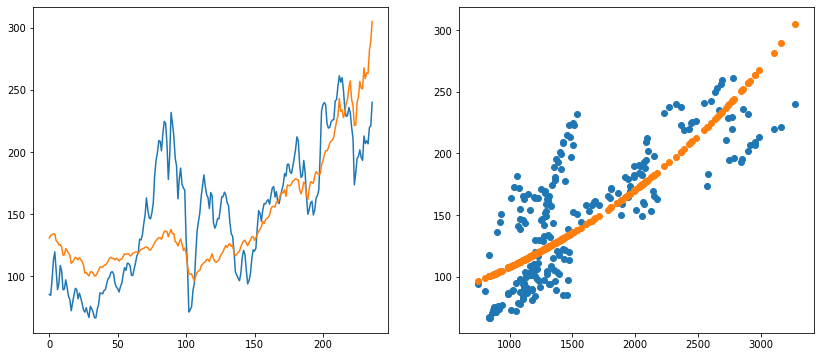

In [4]:
model = Model(x, np.log(target))
alpha_log, beta_log = model.parameters()
y_hat = np.exp(model.predict(x))

elasticity = beta_log * 1

print('Parameters: ')
print(f'alpha: {np.round(np.exp(alpha_log), 4)}  beta: {np.round(np.exp(beta_log), 4)}')
print('===========' * 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

### Model 2: $y = \alpha * e ^{\beta x}$
$y = \alpha * e ^{\beta x}$  ==>  $ln(y) = ln(\alpha) + \beta * x$

Parameters: 
alpha: 68.4891  beta: 0.0005
R_squared: 0.55887  r: 0.74757  f_statistic: 297.7181
Elasticiy:  0.00045590612412498455


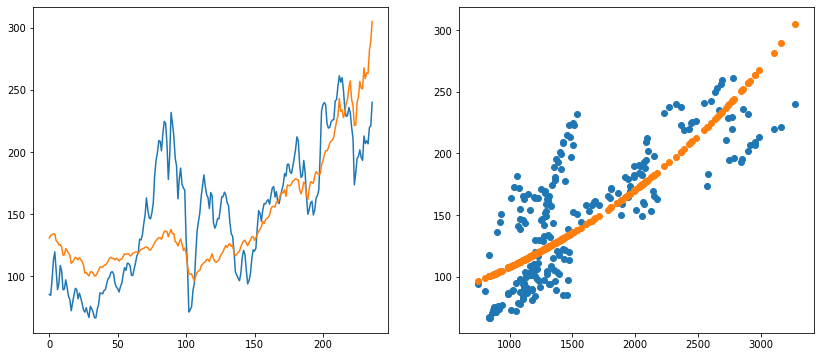

In [5]:
model = Model(x, np.log(target))
alpha_log, beta = model.parameters()
y_hat = np.exp(model.predict(x))

elasticity = beta * 1

print('Parameters: ')
print(f'alpha: {np.round(np.exp(alpha_log), 4)}  beta: {np.round(beta, 4)}')
print('==========='* 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

### Model 3:$y = e ^{\alpha  + \beta x}$
$y = e ^{\alpha  + \beta x}$  ==>  $ln(y) = \alpha + \beta * x$

Parameters: 
alpha: 4.2267  beta: 0.0005
R_squared: 0.55887  r: 0.74757  f_statistic: 297.7181
Elasticiy:  0.00045590612412498455


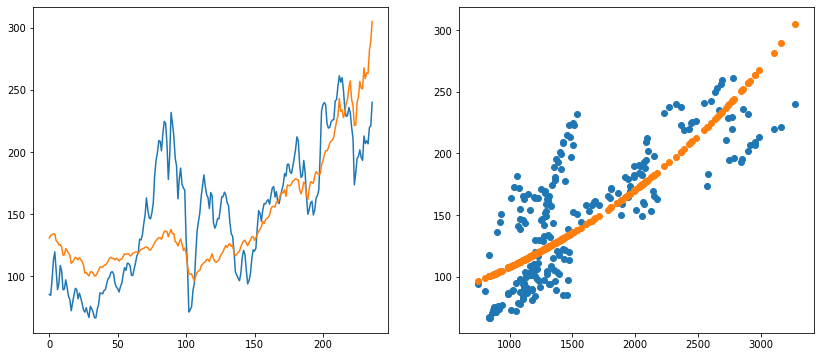

In [6]:
model = Model(x, np.log(target))
alpha, beta = model.parameters()
y_hat = np.exp(model.predict(x))

elasticity = beta * 1

print('Parameters: ')
print(f'alpha: {np.round(alpha, 4)}  beta: {np.round(beta, 4)}')
print('==========='* 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

### Model 4: $y = 10 ^{\alpha  + \beta x}$
$y = 10 ^{\alpha  + \beta * x}$  ==>  $ln_{10}(y) = \alpha + \beta * x$

Parameters: 
alpha: 1.8356  beta: 0.0002
R_squared: 0.55887  r: 0.74757  f_statistic: 297.7181
Elasticiy:  0.00045590612412498477


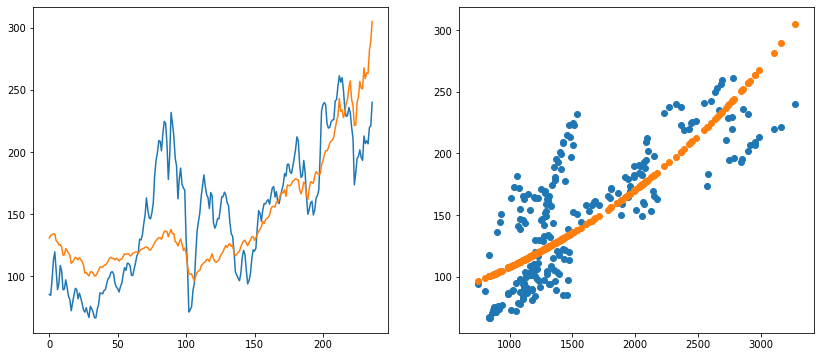

In [7]:
model = Model(x, np.log10(target))
alpha, beta = model.parameters()
y_hat = 10 ** (model.predict(x))

elasticity = beta * np.log(10) * 1

print('Parameters: ')
print(f'alpha: {np.round(alpha, 4)}  beta: {np.round(beta, 4)}')
print('==========='* 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

### Model 5: $y = \alpha * x ^{\beta}$
$y = \alpha * x ^{\beta}$  ==>  $ln(y) = ln(\alpha) + \beta * ln(x)$

Parameters: 
alpha: -0.9837  beta: 0.8123
R_squared: 0.61013  r: 0.78111  f_statistic: 367.77224
Elasticiy:  0.8123111914090257


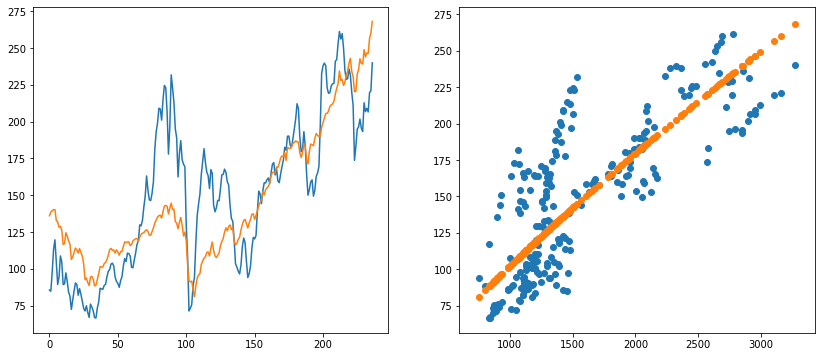

In [8]:
model = Model(np.log(x), np.log(target))
alpha, beta = model.parameters()
y_hat = np.exp(model.predict(np.log(x)))

elasticity = beta * 1

print('Parameters: ')
print(f'alpha: {np.round(alpha, 4)}  beta: {np.round(beta, 4)}')
print('==========='* 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

### Model 6: $y = \alpha + \beta * \frac{1}{x}$ 
$y = \alpha + \beta * \frac{1}{x}$  ==>  $y = \alpha + \beta * x_{new}$, where $x_{new} = \frac{1}{x} $

Parameters: 
alpha: 275.8871  beta: -176267.199
R_squared: 0.628  r: 0.79246  f_statistic: 396.71565
Elasticiy:  -1.0015676174464385


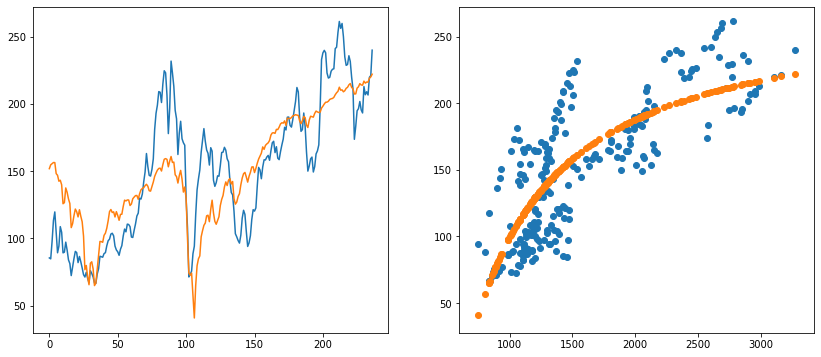

In [9]:
model = Model(1 / x, target)
alpha, beta = model.parameters()
y_hat = model.predict(1 / x)

elasticity = - beta / (alpha * 1 + beta)

print('Parameters: ')
print(f'alpha: {np.round(alpha, 4)}  beta: {np.round(beta, 4)}')
print('==========='* 5)
print(f'R_squared: {np.round(model.R_squared(), 5)}  r: {np.round(np.sqrt(model.R_squared()), 5)}  f_statistic: {np.round(model.F_statistic(), 5)}')
print('===========' * 5)
print('Elasticiy: ', elasticity)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(target)
plt.plot(y_hat)

plt.subplot(1, 2, 2)
plt.scatter(x, target)
plt.scatter(x, y_hat)
plt.show();

From experiments above we can see that $y = \alpha + \beta * \frac{1}{x}$ model (__model 6__) performs the best with correlation coefficient of 0.79 , $R^{2}$ of 0.628 and F-statistic of 396. All of these values are the best among all the models. Therefore we are taking this model for further exploration

# Model analysis

In [10]:
import statsmodels.api as sm
X = sm.add_constant(1 / x)
model = sm.OLS(target, X)
lin = model.fit()
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     396.7
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           2.26e-52
Time:                        21:13:27   Log-Likelihood:                -1151.8
No. Observations:                 237   AIC:                             2308.
Df Residuals:                     235   BIC:                             2315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        275.8871      6.651     41.482      0.000     262.784     288.990
x1         -1.763e+05   8849.767    -19.918      0.000   -1.94e+05   -1.59e+05
==============================================================================
Omnibus:                       14.947   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.724
Skew:                           0.405   Prob(JB):                      0.00469
Kurtosis:                       2.343   Cond. No.                     4.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothesis testing  $\alpha$ = 0 
$H_0: \alpha = 0 $ <br>
$H_1: \alpha \ne 0 $ <br>
From the second table above in the __const__ row we can see that obtained t-test results are equal to 41.482 and corresponding p-value is 0.000. As obtained p-value is below 0.05 it means that the variable is significant . Therefore, the $\alpha$ is most probably different from 0. Lets check whether given confidence intervals in the table are true.

In [11]:
upper_bound = lin.params[0] + t.ppf(1-0.025, 250) * lin.bse[0]
lower_bound = lin.params[0] - t.ppf(1-0.025, 250) * lin.bse[0]
print('Alpha Upper_bound: ',upper_bound, ' Lower bound: ', lower_bound)

Alpha Upper_bound:  288.9857900550563  Lower bound:  262.7883120482471


### Hypothesis testing  $\beta$ = 0 
$H_0: \beta = 0 $ <br>
$H_1: \beta \ne 0 $ <br>
From the second table above in the __x1__ row we can see that obtained t-test results are equal to -19.918 and corresponding p-value is 0.000. As obtained p-value is below 0.05 it means that the variable is significant . Therefore, the $\beta$ is most probably different from 0. Lets check whether given confidence intervals in the table are true.

In [12]:
upper_bound = lin.params[1] + t.ppf(1-0.025, 250) * lin.bse[1]
lower_bound = lin.params[1] - t.ppf(1-0.025, 250) * lin.bse[1]
print('Beta Upper_bound: ',upper_bound, ' Lower bound: ', lower_bound)

Beta Upper_bound:  -158837.59714003632  Lower bound:  -193696.8008840627


### F-statistic
$H_0: \beta_1 ... \beta_n = 0 $  (if all $\beta$s are 0, then none of the independent variables matter. Therefore, our model has no merit)<br> 
$H_1$: at least one $\beta$ from $\beta_1 ... \beta_n \ne 0 $ <br>

In our case, F-statistic is 396.7 with a p-value of close to 0.000. We can say that the overall model is significant. One thing worth mentioning is, the lower the F-statistic, the closest model to be non-significant. 

### Predictions with 95% confidence intervals

In [13]:
yprd_ci_lower, yprd_ci_upper = summary_table(lin, alpha = 0.05)[1][:, 4:6].T

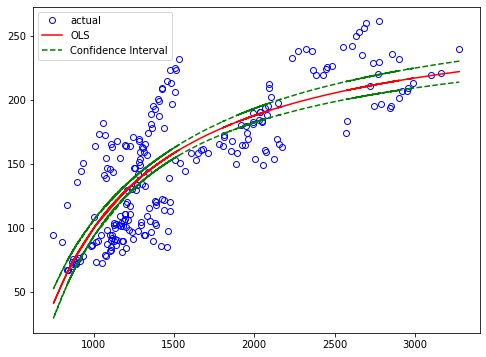

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(x, target, linestyle = "None", marker = "o", label = "actual", markerfacecolor = "None", color = "blue")
plt.plot(x, y_hat, color = "red", label = "OLS")
plt.plot(x, yprd_ci_lower, color = "green", linestyle = "--", label = "Confidence Interval")
plt.plot(x, yprd_ci_upper, color = "green", linestyle = "--")
plt.legend()
plt.show();

# Forecast

In [15]:
x_mat = np.array([1, x[-1] * 1.2])

dt = lin.get_prediction(1 / x_mat).summary_frame(alpha = 0.05)
y_prd = dt['mean']
y_prd_ci_lower = dt['obs_ci_lower']
y_prd_ci_upper = dt['obs_ci_upper']

print(f'x = {x_mat[1]} y_hat = {y_prd[0]}')
print(f'y confidence intervals: ({y_prd_ci_lower[0]}, {y_prd_ci_upper[0]})')

x = 3931.4459477999994 y_hat = 231.051842491634
y confidence intervals: (168.6405340107915, 293.4631509724765)


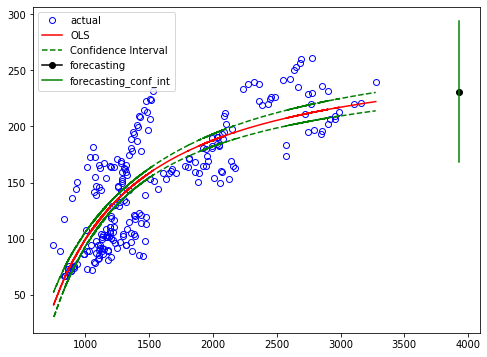

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x, target, linestyle = "None", marker = "o", label = "actual", markerfacecolor = "None", color = "blue")
plt.plot(x, y_hat, color = "red", label = "OLS")
plt.plot(x, yprd_ci_lower, color = "green", linestyle = "--", label = "Confidence Interval")
plt.plot(x, yprd_ci_upper, color = "green", linestyle = "--")
plt.plot([x_mat[-1]], [y_prd[0]], marker='o', color='k', label='forecasting')
plt.plot([x_mat[-1],x_mat[-1] ], [y_prd_ci_upper[0], y_prd_ci_lower[0]], color='green', label='forecasting_conf_int')
plt.legend()
plt.show();